In [19]:
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [20]:
data_filename = r'.\datasets\chapter_2\ionosphere.data'

In [21]:
X = np.zeros((351, 34), dtype='float')
y = np.zeros((351,), dtype='bool')

In [22]:
with open(data_filename, 'r') as input_file:
    reader = csv.reader(input_file)
    for i, row in enumerate(reader):
        data = [float(datum) for datum in row[:-1]]
        X[i] = data
        y[i] = row[-1] == 'g'

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)

In [24]:
estimator = KNeighborsClassifier()
estimator.fit(X_train, y_train)

y_predicted = estimator.predict(X_test)
accuracy = np.mean(y_test == y_predicted) * 100
print("The accuracy is {0:.1f}%".format(accuracy))

The accuracy is 86.4%


In [25]:
scores = cross_val_score(estimator, X, y, scoring='accuracy')
average_accuracy = np.mean(scores) * 100
print("The average accuracy is {0:.1f}%".format(average_accuracy))

The average accuracy is 82.6%


In [26]:
avg_scores = []
all_scores = []

parameter_values = list(range(1, 21))
for n_neighbors in parameter_values:
    estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(estimator, X, y, scoring='accuracy')
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

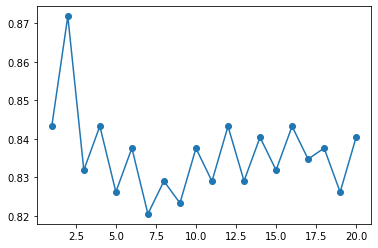

In [27]:
plt.plot(parameter_values, avg_scores, '-o')

In [28]:
X_broken = np.array(X)
X_broken[:, ::2] /= 10

In [31]:
estimator = KNeighborsClassifier()
original_scores = cross_val_score(estimator, X, y, scoring='accuracy')
print("The original average accuracy for is {0:.1f}%".format(np.mean(original_scores) * 100)) 
broken_scores = cross_val_score(estimator, X_broken, y,
scoring='accuracy')
print("The 'broken' average accuracy for is {0:.1f}%".format(np.mean(broken_scores) * 100))

The original average accuracy for is 82.6%
The 'broken' average accuracy for is 73.8%


In [34]:
from sklearn.preprocessing import MinMaxScaler

X_transformed = MinMaxScaler().fit_transform(X_broken)
estimator = KNeighborsClassifier()
transformed_scores = cross_val_score(estimator, X_transformed, y, scoring='accuracy')
print(f"The average accuracy for this is {np.mean(transformed_scores) * 100}")

The average accuracy for this is 82.90140845070422


In [35]:
from sklearn.pipeline import Pipeline

scaling_pipeline = Pipeline([('scale', MinMaxScaler()), ('predict', KNeighborsClassifier())])

In [36]:
scores = cross_val_score(scaling_pipeline, X_broken, y, scoring='accuracy')
print(f"The average accuracy for this is {np.mean(transformed_scores) * 100}")

The average accuracy for this is 82.90140845070422
